In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#Import Libraries for decision tree
from sklearn import tree

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
import xgboost as xgb

In [72]:
os.getcwd()
os.chdir('/Users/maneeshagvs/Documents/datasets')
train = pd.read_csv('Train_dataset.csv')
test = pd.read_csv('Test_dataset.csv')
test_id = test.ID_code
Y =train['target']
X = train.drop(columns=['target','ID_code'])
test = test.drop(columns=['ID_code'])

def missingvalues(df):
    count = 0
    for i in df.columns:
        if(df[i].isnull().sum() != 0):
            print("The missing values are present for",df[i].isnull().sum(),i)
            count+=1
    if(count == 0):
        print("There are no missing values present")
    return count

def constants(df):
    count = 0 
    for i in df.columns:
        if(len(df[i].unique()) == 1):
            print("The value is constant",len(df[i].unique()),i)
            count+=1
    if(count == 0):
        print("There are no constant present")
    return count

print("missing values train count : ",missingvalues(train))
print("missing values test count : ",missingvalues(test))
print("constant values count : ",constants(train))
print("constant values count : ",constants(test))


def Remove_duplicate():
    remove = []
    cols = train.columns
    for i in range(len(cols)-1):
        v = train[cols[i]].values
    for j in range(i+1,len(cols)):
        if np.array_equal(v,train[cols[j]].values):
            remove.append(cols[j])
    train.drop(remove, axis=1, inplace=True)
    test.drop(remove, axis=1, inplace=True)
    
def accuracy_cal(i,actual,predicted):
    CM = pd.crosstab(actual,predicted)
    #let us save TP, TN, FP, FN
    TN = CM.iloc[0,0]
    FN = CM.iloc[1,0]
    TP = CM.iloc[1,1]
    FP = CM.iloc[0,1]
    error_table.loc['Accuracy',i]=((TP+TN)*100)/(TP+TN+FP+FN)
    error_table.loc['FalsePositive',i]=((FP*100)/(FP+TN))
    print("Accuracy , FalsePositive:",error_table.loc['Accuracy',i],error_table.loc['FalsePositive',i])
    

    
train0 = train[ train['target']==0 ].copy()
train1 = train[ train['target']==1 ].copy()

There are no missing values present
missing values train count :  0
There are no missing values present
missing values test count :  0
There are no constant present
constant values count :  0
There are no constant present
constant values count :  0


In [73]:
Remove_duplicate()

In [74]:
##################################### RANDOM FOREST ################################################################
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.2, random_state=40)
RF_model = RandomForestClassifier(n_estimators = 20).fit(X2_train, Y2_train)
RF_Predictions = RF_model.predict(X2_test)
accuracy_cal('Random Forest',Y2_test, RF_Predictions)

Accuracy , FalsePositive: 90.06 0.01944174420219414


In [75]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [76]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


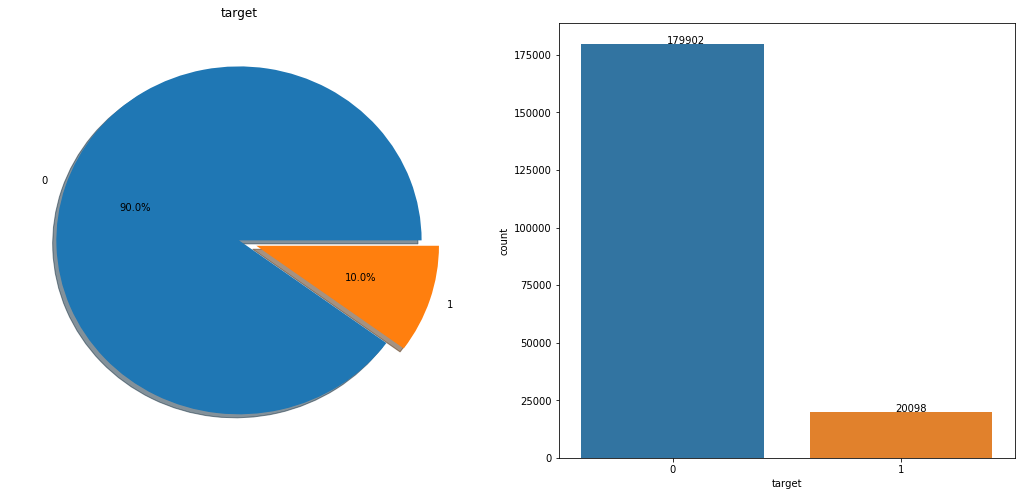

In [77]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['target'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
s = sns.countplot(train["target"], 
                   order = train["target"].value_counts().index)
for p, label in zip(s.patches, train["target"].value_counts()):
    s.annotate(label, (p.get_x()+0.375, p.get_height()+0.15))

plt.show()

In [78]:
check_balance(train,'target')

size of data is: 200000
for target  0 =
89.95100000000001 %
for target  1 =
10.049 %


In [ ]:
(pd.Series(RF_model.feature_importances_, index=X.columns).nlargest(20).plot(kind='bar'))

In [ ]:
feature_importance = pd.DataFrame(pd.Series(rf.feature_importances_, index=x.columns).nlargest(20))
train_imp = train.loc[:,feature_importance.index]
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = train_imp.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [70]:
plt.figure(figsize=(8,5))
for i in train_imp.columns:
    sns.distplot(train0[i], label = 't=0')
    sns.distplot(train1[i], label = 't=1')
    plt.legend()
    plt.xlim(xx)
    plt.xlabel(i)
    plt.show()

NameError: name 'train_imp' is not defined

<Figure size 576x360 with 0 Axes>

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='hist')` instead of `Series.plot('hist',)`.
  """Entry point for launching an IPython kernel.


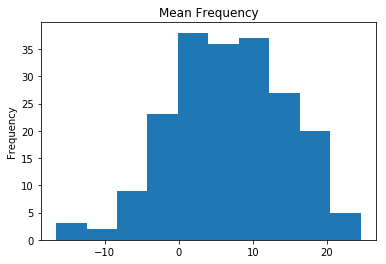

In [178]:
train[train.columns[2:]].mean().plot('hist');plt.title('Mean Frequency');

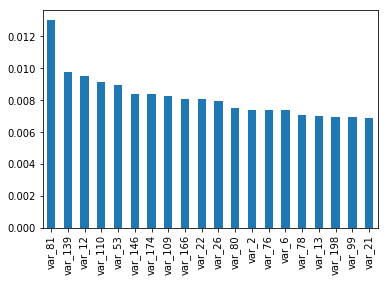

In [31]:
###################################### NAIVE_BAYES ###################################################################
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#Naive Bayes implementation
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, test_size=0.3, random_state=40)

NB_model = GaussianNB().fit(X3_train, Y3_train)

#predict test cases
NB_Predictions = NB_model.predict(X3_test)

accuracy_cal('NaviesBayes',Y3_test,NB_Predictions)

Accuracy , FalsePositive: 92.115 1.7228298081015563


In [33]:
#################################### DECISION TREE ##################################################################
#Decision Tree
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X, Y, test_size=0.3,random_state=40)

C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X4_train, Y4_train)

#predict new test cases
C50_Predictions = C50_model.predict(X4_test)
accuracy_cal('DecisionTree',Y4_test,C50_Predictions) 

Accuracy , FalsePositive: 83.70833333333333 9.222968596754196


In [47]:
# split X and y into training and testing sets

X5_train,X5_test,Y5_train,Y5_test=train_test_split(X,Y,test_size=0.25,random_state=0)


In [49]:
################################## LOGISTIC REGRESSION ##############################################################

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X5_train,Y5_train)

#
Y5_pred=logreg.predict(X5_test)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [52]:
cnf_matrix = metrics.confusion_matrix(Y5_test, Y5_pred)
cnf_matrix

array([[44259,   643],
       [ 3735,  1363]])

Text(0.5,257.44,'Predicted label')

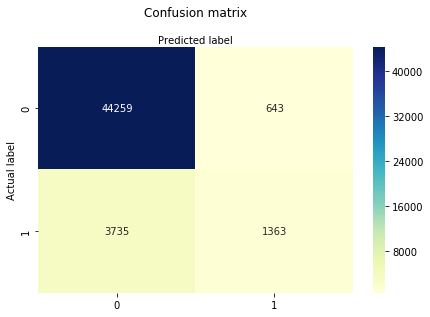

In [53]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

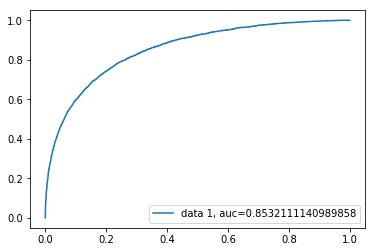

In [54]:
y_pred_proba = logreg.predict_proba(X5_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y5_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y5_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [67]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size=0.3, random_state=40)
## # Feature selection
clf = ExtraTreesClassifier(random_state=1729)
selector = clf.fit(X1_train, Y1_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(140000, 76) (60000, 76) (200000, 76)
Accuracy , FalsePositive: 50.0 50.0
Roc AUC:  0.83741281014033


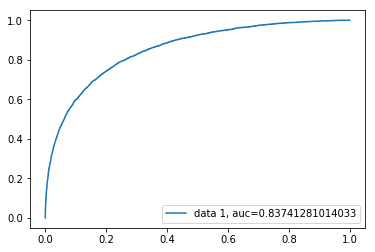

In [68]:
 ####################################XGBOOST ############################################################################

fs = SelectFromModel(selector, prefit=True)
X1_train = fs.transform(X1_train)
X1_test = fs.transform(X1_test)
test = fs.transform(test)

print(X1_train.shape, X1_test.shape, test.shape)

## # Train Model
# classifier from xgboost
m2_xgb = xgb.XGBClassifier(n_estimators=110, nthread=-1, max_depth = 4,seed=1729)
m2_xgb.fit(X1_train,Y1_train, eval_metric="auc", verbose = False,eval_set=[(X1_test, Y1_test)])

# calculate the auc score
print("Roc AUC: ", metrics.roc_auc_score(Y1_test, m2_xgb.predict_proba(X1_test)[:,1],
              average='macro'))

auc = metrics.roc_auc_score(Y1_test, m2_xgb.predict_proba(X1_test)[:,1])
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
## final Submission
probs = m2_xgb.predict_proba(test)
submission = pd.DataFrame({"ID":test_id, "TARGET": probs[:,1]})
submission.to_csv("submission.csv", index=False)

In [79]:
###over error metrics

print(error_table)

               Random Forest  NaviesBayes  DecisionTree  XGBoost
Accuracy           90.060000     92.11500     83.708333     50.0
FalsePositive       0.019442      1.72283      9.222969     50.0
